In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
os.getcwd()

'/root/LR_ML'

In [3]:
datafile = u"/root/LR_ML/newData3.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0)

In [5]:
TIP.head()

,SBPI,SBPL,DBPI,DBPL,BPMI,BPML,LOP,NOTE
0,133,139,85,87,83,87,145.0,NaN
1,135,128,89,82,92,96,140.0,NaN
2,113,104,64,63,70,69,125.0,NaN
3,116,118,73,62,72,74,120.0,NaN
4,105,100,68,70,85,82,110.0,NaN


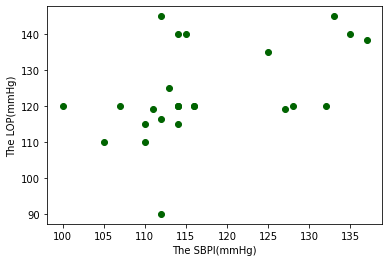

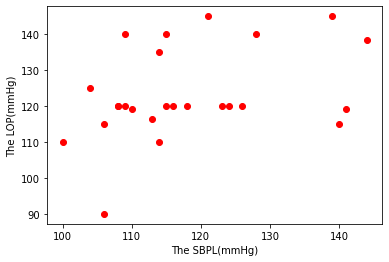

In [6]:
modTIP = TIP.drop(['NOTE'], axis = 1)
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBPI,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPL,modTIP.LOP,color = 'red',label = "Exam Data")
plt.xlabel("The SBPL(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBPI        SBPL       DBPI       DBPL       BPMI       BPML  \
count   25.000000   25.000000  25.000000  25.000000  25.000000  25.000000   
mean   117.040000  118.040000  73.320000  70.360000  80.640000  78.280000   
std      9.787237   12.377668  11.440862  10.181192   9.560683   9.774627   
min    100.000000  100.000000  59.000000  56.000000  65.000000  63.000000   
25%    112.000000  109.000000  64.000000  62.000000  74.000000  71.000000   
50%    114.000000  115.000000  70.000000  66.000000  80.000000  78.000000   
75%    125.000000  124.000000  84.000000  81.000000  85.000000  85.000000   
max    137.000000  144.000000  99.000000  92.000000  97.000000  96.000000   

              LOP  
count   25.000000  
mean   123.332000  
std     12.795693  
min     90.000000  
25%    119.200000  
50%    120.000000  
75%    135.000000  
max    145.000000  
          SBPI      SBPL      DBPI      DBPL      BPMI      BPML       LOP
SBPI  1.000000  0.714705  0.531252  0.780114  0.357

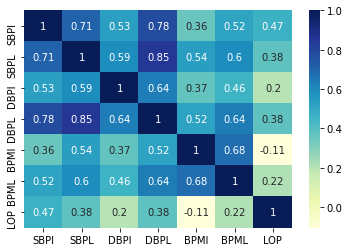

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")

自變量---源數據: (25,) ；  訓練集: (20,) ；  測試集: (5,)
因變量---源數據: (25,) ；  訓練集: (20,) ；  測試集: (5,)


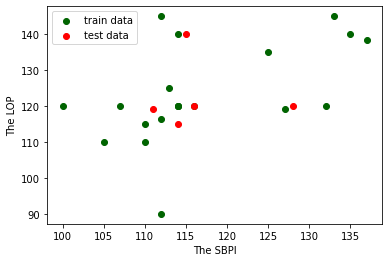

In [8]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBPI,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPI.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (25,) ；  訓練集: (20,) ；  測試集: (5,)
因變量---源數據: (25,) ；  訓練集: (20,) ；  測試集: (5,)


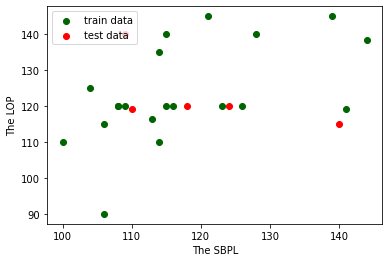

In [9]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.SBPL,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPL.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

In [10]:
# plt.scatter(modTIP.SBP1, modTIP.TIP, color="darkgreen", label="分布")

In [11]:
# X_1 = np.array([1 for i in range(28)])
# x_train = np.array(X_train)
# x = np.zeros((28,2))
# x[:,0] = X_1
# x[:,1] = x_train
# #線性迴歸訓練
# model = LinearRegression()
# model.fit(x,Y_train)#調用線性迴歸包
# a  = model.intercept_#截距
# b = model.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred = model.predict(x)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
# plt.scatter(X_test, Y_test, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The SBP")#添加 X 軸名稱
# plt.ylabel("The TIP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a,",迴歸係數：",b)
# print("最佳擬合線: Y = ",round(a,2),"+",round(b[1],2),"* X")
# #顯示線性方程，並限制參數的小數位爲兩位

In [12]:
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (20,1))#reshape換成(28,1)

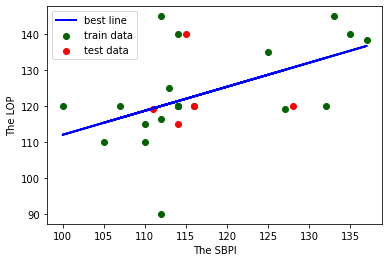

擬合參數:截距 45.104497603158165 ,迴歸係數： [0.66904784]
最佳擬合線: Y =  45.1 + 0.67 * X


In [13]:
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train_pred = model.predict(q)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: Y = ",round(a,2),"+",round(b[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [14]:
q2 = np.array(X_train2)#q原先shape是(28,0)
np.shape(q2)
q2 = np.reshape(q2, (20,1))#reshape換成(28,1)

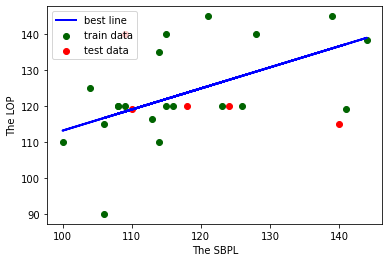

擬合參數:截距 54.45831393415362 ,迴歸係數： [0.58716329]
最佳擬合線: Y =  54.46 + 0.59 * X


In [15]:
model2 = LinearRegression()
model2.fit(q2,Y_train2)#調用線性迴歸包
# model.fit(X_train,Y_train)
a2  = model2.intercept_#截距
b2 = model2.coef_#迴歸係數
#訓練數據的預測值
y_train_pred2 = model2.predict(q2)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train2, y_train_pred2, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train2, Y_train2, color='darkgreen', label="train data")
plt.scatter(X_test2, Y_test2, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a2,",迴歸係數：",b2)
print("最佳擬合線: Y = ",round(a2,2),"+",round(b2[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位